In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# Load the Breast Cancer Wisconsin (Diagnostic) dataset
data = load_breast_cancer()
X = data.data

In [5]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create K-means model
k = 2  
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the K-means model to the data
kmeans.fit(X_scaled)

# Predict the cluster labels
cluster_labels = kmeans.labels_

# Define ground truth labels
y_true = data.target

# Calculate accuracy
accuracy = accuracy_score(y_true, cluster_labels)

In [7]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, cluster_labels)

# Calculate precision and recall
precision = precision_score(y_true, cluster_labels)
recall = recall_score(y_true, cluster_labels)

# Calculate error rate (misclassification rate)
error_rate = 1 - accuracy

print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9103690685413005
Error Rate: 0.08963093145869949
Precision: 0.9026315789473685
Recall: 0.9607843137254902
Confusion Matrix:
[[175  37]
 [ 14 343]]


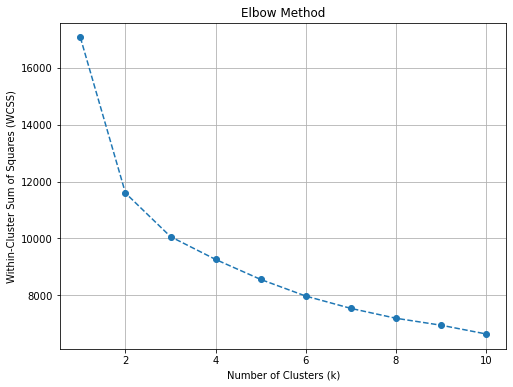

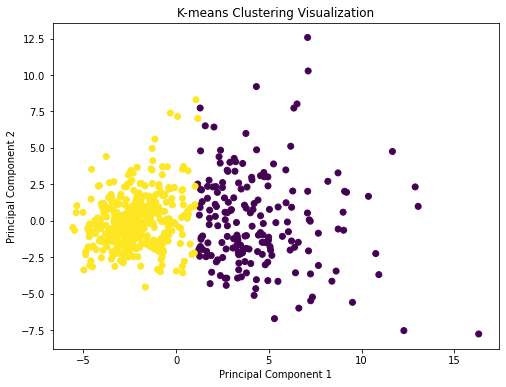

In [8]:
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid()
plt.show()

# Create K-means model with the optimal number of clusters
k_optimal = 2  # Replace with your determined optimal value
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(X_scaled)

# Visualize the clusters
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-means Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
